<a href="https://colab.research.google.com/github/ahmed-mehanna/sign-language-detection/blob/sign-language-detection/mehanna_sign_language_detection_v5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install mediapipe

#Download Dataset

## Training Dataset

###Download Dataset

In [ ]:
!wget http://158.109.8.102/AuTSL/data/train/train_set_vfbha39.zip.001

In [ ]:
BASE_LINK = "http://158.109.8.102/AuTSL/data/train/train_set_vfbha39.zip."
START_PART = 1
END_PART = 19
for i in range(START_PART, END_PART):
    PART = "0"
    if (i >= 1 and i < 10):
        PART = PART + "0" + str(i)
    else:
        PART = PART + str(i)
    LINK = BASE_LINK + PART
    !wget $LINK

### Unziping Dataset

*Password:* *MdG3z6Eh1t*

In [ ]:
!7z x train_set_vfbha39.zip.001

In [ ]:
BASE_NAME = "train_set_vfbha39.zip."
START_PART = 1
END_PART = 19
for i in range(START_PART, END_PART):
    PART = "0"
    if (i >= 1 and i < 10):
        PART = PART + "0" + str(i)
    else:
        PART = PART + str(i)
    NAME = BASE_NAME + PART
    !7z x $NAME

### Download Labels

In [ ]:
!wget http://158.109.8.102/AuTSL/data/train/train_labels.csv

## Validation Dataset

###Download Dataset

In [ ]:
!wget http://158.109.8.102/AuTSL/data/validation/val_set_bjhfy68.zip.001

In [ ]:
BASE_LINK = "http://158.109.8.102/AuTSL/data/validation/val_set_bjhfy68.zip."
START_PART = 1
END_PART = 4
for i in range(START_PART, END_PART):
    PART = "0"
    if (i >= 1 and i < 10):
        PART = PART + "0" + str(i)
    else:
        PART = PART + str(i)
    LINK = BASE_LINK + PART
    !wget $LINK

### Unziping Dataset

*Password:* *bhRY5B9zS2*

In [ ]:
!7z x val_set_bjhfy68.zip.001

In [ ]:
BASE_NAME = "val_set_bjhfy68.zip."
START_PART = 1
END_PART = 4
for i in range(START_PART, END_PART):
    PART = "0"
    if (i >= 1 and i < 10):
        PART = PART + "0" + str(i)
    else:
        PART = PART + str(i)
    NAME = BASE_NAME + PART
    !7z x $NAME
    

### Download Labels

In [ ]:
!wget http://158.109.8.102/AuTSL/data/validation/validation_labels.zip

### Unziping Labels

*Password:* *zYX5W7fZ*

In [ ]:
!7z x validation_labels.zip

In [5]:
!mv ground_truth.csv val_labels.csv

## Test Dataset

###Download Dataset

In [ ]:
BASE_LINK = "http://158.109.8.102/AuTSL/data/test/test_set_xsaft57.zip."
START_PART = 1
END_PART = 4
for i in range(START_PART, END_PART):
    PART = "0"
    if (i >= 1 and i < 10):
        PART = PART + "0" + str(i)
    else:
        PART = PART + str(i)
    LINK = BASE_LINK + PART
    !wget $LINK

### Unziping Dataset

*Password:* *ds6Kvdus3o*

In [ ]:
!7z x test_set_xsaft57.zip.001

In [ ]:
BASE_NAME = "test_set_xsaft57.zip."
START_PART = 1
END_PART = 4
for i in range(START_PART, END_PART):
    PART = "0"
    if (i >= 1 and i < 10):
        PART = PART + "0" + str(i)
    else:
        PART = PART + str(i)
    NAME = BASE_NAME + PART
    !7z x $NAME
    

### Download Labels

In [ ]:
!wget http://158.109.8.102/AuTSL/data/test/test_labels.zip

### Unziping Labels

*Password:* *ds6Kvdus3o*

In [ ]:
!7z x test_labels.zip

In [ ]:
!mv ground_truth.csv test_labels.csv

## Download Class Id

In [ ]:
!wget https://data.chalearnlap.cvc.uab.cat/AuTSL/data/SignList_ClassId_TR_EN.csv

In [ ]:
!mv SignList_ClassId_TR_EN.csv class_id.csv

## Arabic Dataset

### Download Dataset

In [ ]:
!wget https://md-datasets-public-files-prod.s3.eu-west-1.amazonaws.com/9707d9f8-aa7e-44a6-8c26-3dfac19e9446

### Unziping Dataset

In [ ]:
!7z x 9707d9f8-aa7e-44a6-8c26-3dfac19e9446

#Dataset Files Separation

In [ ]:
!mkdir labels/
!mv train_labels.csv labels/train_labels.csv
!mv val_labels.csv labels/val_labels.csv
!mv test_labels.csv labels/test_labels.csv

In [ ]:
!mkdir train/color/
!mkdir train/depth/
!mkdir val/color/
!mkdir val/depth/
!mkdir test/color/
!mkdir test/depth/

### Separate color and depth videos in a separated folders


*   You have to create a new two directories to separate color and depth videos



In [8]:
import os
from os import listdir
from os.path import join, isfile

FOLDER_PATHS = ["train/", "val/", "test/"]
for folder_path in FOLDER_PATHS:
    FILENAMES = [f for f in listdir(folder_path) if isfile(join(folder_path, f))]

    current = "/content/"+folder_path
    to = "/content/"+folder_path

    for file_name in FILENAMES:
        if "_color" in file_name:
            os.rename(current+file_name, to+"color/"+file_name)
        else:
            os.rename(current+file_name, to+"depth/"+file_name)


#Image Processing

In [146]:
from skimage.metrics import structural_similarity as compare_ssim
import cv2
import glob
import numpy as np
import math

FRAMES = 15
DIM = (512, 512)

# def capture_frames(video_path):
#     count = 0
#     cap = cv2.VideoCapture(video_path)
#     frames = []

#     while cap.isOpened():
#         ret, frame = cap.read()
#         if ret:
#             frame = cv2.resize(frame, DIM)
#             frame = (frame/255.0).astype(np.float16)
#             frames.append(frame)
#             count += 10
#             cap.set(cv2.CAP_PROP_POS_FRAMES, count)
#         else: 
#             cap.release()
#     return np.array(frames[:], dtype="float32")

# def capture_frames(video_path):
#     count = 0
#     frames = []
#     last_frame = None
#     scores = []
#     diffs = []
#     cap = cv2.VideoCapture(video_path)
#     # frame_rate = cap.get(cv2.CAP_PROP_FRAME_COUNT)
#     # if FRAMES >= 0 & FRAMES <= frame_rate:
#     #     cap.set(cv2.CAP_PROP_POS_FRAMES, FRAMES)

#     while cap.isOpened():
#         ret, frame = cap.read()
#         if not ret:
#             break
#         # frame_gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
#         if last_frame is None:
#             last_frame = frame
#         else:
#             (score, diff) = compare_ssim(last_frame, frame, full=True, multichannel=True)
#             diff = (diff * 255).astype("uint8")
#             last_frame = frame
#             if score < 0.99:
#                 continue
#             scores.append(score)
#             diffs.append(diff)
#         frame = cv2.resize(frame, DIM)
#         frame = (frame/255.0).astype(np.float16)
#         frames.append(frame)

#     return np.array(frames[:], dtype="float32"), scores, diffs



def capture_frames(video_path):
  video = cv2.VideoCapture(video_path)
  video_length = int(video.get(cv2.CAP_PROP_FRAME_COUNT)) - 1

  count=0
  frames = []
  while video.isOpened():
      ret, frame = video.read()
      if not ret:
          continue
      frames.append(frame)
      count += 1
      if (count > (video_length-1)):
          video.release()
  video.release()
  return np.array(frames)


def get_frames(video_path, num_frames=FRAMES, dim=DIM):
  frames = capture_frames(video_path)
  video_length = len(frames)
  steps = video_length/num_frames
  count=0
  new_frames=[]
  while count<video_length:
    frame = frames[int(count)]
    frame = cv2.resize(frame, dim)
    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    # frame =  (frame/255.0).astype(np.float16)
    new_frames.append(frame)
    count+=steps

  s = np.array(new_frames[:num_frames])
#   print("SHAPE",s.shape)
  return np.array(new_frames[:num_frames])


# frames, scores, diffs = capture_frames("train/color/signer0_sample1001_color.mp4")
frames = get_frames("val/color/signer11_sample100_color.mp4")
print(len(frames))
print(frames[0].shape)

15
(512, 512, 3)


In [147]:
from matplotlib import pyplot as plt
import mediapipe as mp
import cv2

mp_holistic = mp.solutions.holistic
mp_drawing = mp.solutions.drawing_utils

def pose_detection(image, model):
    image.flags.writeable = False
    results = model.process(image)
    image.flags.writeable = True
    return image, results

def draw_landmarks(image, results):
    # mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION)
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS)
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS)
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS)
    

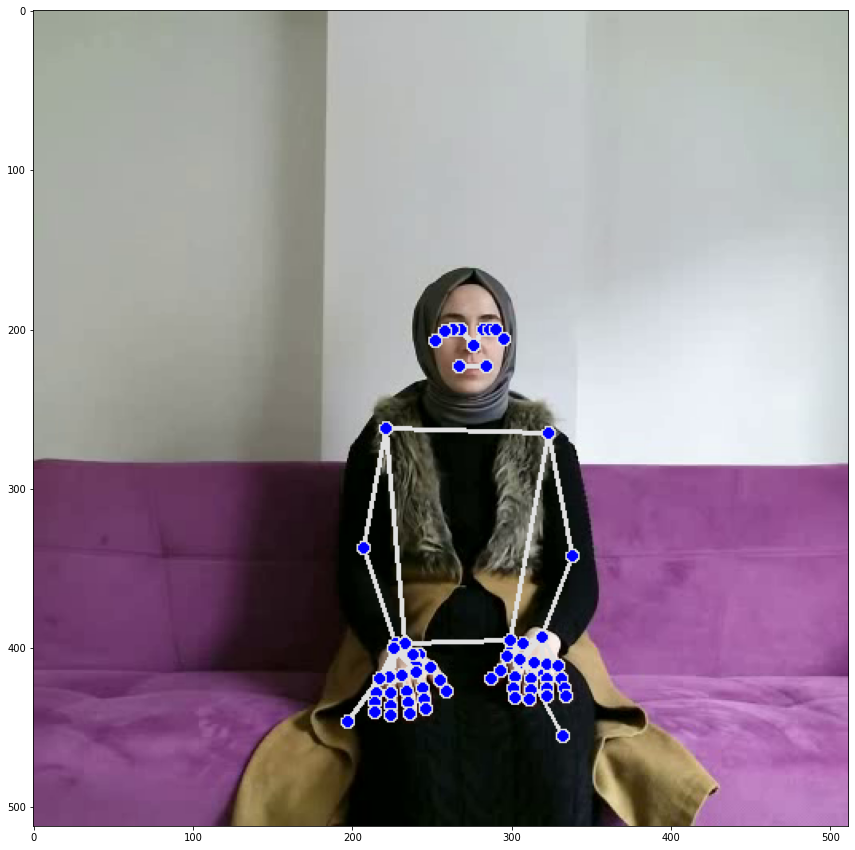

In [14]:
frames = get_frames("val/color/signer11_sample100_color.mp4")

holistic = mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5)
image, results = pose_detection(frames[1], holistic)
draw_landmarks(image, results)
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15, 15))
ax.imshow(image)

In [ ]:
# from matplotlib import pyplot as plt
# print(len(scores))
# print(max(scores), min(scores))
# print(scores[0], scores[1])
# fig, ax = plt.subplots()
# ax.imshow(frames[0])
# fig, ax = plt.subplots()
# ax.imshow(frames[5])

# for frame in frames:
#     fig, ax = plt.subplots()
#     ax.imshow(frame)


#Load Dataset

In [15]:
import pandas as pd


columns = ["signerX_sampleY", "sample_id"]
train_labels = pd.read_csv("labels/val_labels.csv", names=columns)
# val_labels = pd.read_csv("labels/val_labels.csv", names=columns)
# test_labels = pd.read_csv("labels/test_labels.csv", names=columns)

train_labels[:]

,signerX_sampleY,sample_id
0,signer1_sample1,136
1,signer1_sample2,130
2,signer1_sample3,139
3,signer1_sample4,222
4,signer1_sample5,31
...,...,...
4413,signer25_sample648,185
4414,signer25_sample649,116
4415,signer25_sample650,28
4416,signer25_sample651,34


In [16]:
indexes = train_labels[train_labels.sample_id == 41]
indexes = indexes.append(train_labels[train_labels.sample_id == 104])
indexes = indexes.append(train_labels[train_labels.sample_id == 205])
# indexes = indexes.append(train_labels[train_labels.sample_id == 26])
# indexes = indexes.append(train_labels[train_labels.sample_id == 191])
indexes.sample_id.replace({
    41: 0,
    104: 1,
    205: 2
}, inplace=True)
train_indexes = indexes.sample(frac=1)
train_indexes.head(10)

,signerX_sampleY,sample_id
2115,signer11_sample118,0
3633,signer18_sample531,2
1876,signer35_sample533,1
3660,signer18_sample558,2
1417,signer35_sample74,2
64,signer1_sample65,1
274,signer1_sample275,0
1372,signer35_sample29,1
1614,signer35_sample271,0
2369,signer11_sample372,1


In [ ]:
indexes = val_labels[val_labels.sample_id == 41]
indexes = indexes.append(val_labels[val_labels.sample_id == 104])
indexes = indexes.append(val_labels[val_labels.sample_id == 205])
# indexes = indexes.append(val_labels[val_labels.sample_id == 26])
# indexes = indexes.append(val_labels[val_labels.sample_id == 191])
indexes.sample_id.replace({
    41: 0,
    104: 1,
    205: 2
}, inplace=True)
val_indexes = indexes.sample(frac=1)
val_indexes.head(10)

,signerX_sampleY,sample_id
2818,signer16_sample152,2
274,signer1_sample275,0
1284,signer1_sample1285,1
2369,signer11_sample372,1
2912,signer16_sample246,1
3768,signer25_sample3,0
3598,signer18_sample496,0
4006,signer25_sample241,2
322,signer1_sample323,2
1590,signer35_sample247,2


In [19]:
n_classes = len(train_indexes.iloc[:, 1].value_counts())
n_classes

3

In [18]:
len(val_indexes.iloc[:, 1].value_counts())

# Create Dataset and Dataloader

In [83]:
import torch
from torch import nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
from torchvision.transforms import ToTensor, Lambda

class AUTSL(Dataset):
    def __init__(self, labels, folder_path, dim=(15, 512, 512), n_channels=3, n_classes=10, video_type="color", transform=None, target_transform=None):
        self.labels = labels
        self.folder_path = folder_path
        self.num_frames = dim[0]
        self.img_size = (dim[1], dim[2])
        self.dim = dim
        self.n_channels = n_channels
        self.n_classes = n_classes
        self.video_type = video_type
        self.transform = transform
        self.target_transform = target_transform
    
    def __len__(self):
        return len(self.labels)
    
    def __getitem__(self, idx):
        sample_name = self.labels.iloc[idx, 0] + "_" + self.video_type + ".mp4"
        video_path = self.folder_path + sample_name
        np_frames = get_frames(video_path, num_frames=self.num_frames, dim=self.img_size)
        frames = torch.empty((self.num_frames, self.n_channels, *self.img_size))
        label = self.labels.iloc[idx, 1]
        if self.transform:
            for i in range(self.num_frames):
                frames[i] = self.transform(np_frames[i])
        if self.target_transform:
            label = self.target_transform(label)
        return frames, label
    

In [84]:
params = {
    "dim": (1, *DIM),
    "n_channels": 3,
    "n_classes": n_classes,
    "transform": ToTensor(),
    "target_transform": Lambda(lambda y: torch.zeros(n_classes, dtype=torch.float).scatter_(0, torch.tensor(y), value=1))
};

autsl_dataset = AUTSL(train_indexes, "val/color/", **params)
frames, label = autsl_dataset[0]
# print(type(frames))
# print(frames.shape)
# print(type(frames[0]))
# print(frames[0].shape)
# print(label)
autsl_dl = DataLoader(autsl_dataset, batch_size=10, shuffle=True)

In [85]:
frames.size()

torch.Size([1, 3, 512, 512])

# Build Model

In [162]:
import torchvision

class Identity(nn.Module):
    def __init__(self):
        super(Identity, self).__init__()

    def forward(self, x):
        return x

class BaseModel(nn.Module):
    def __init__(self):
        super(BaseModel, self).__init__()
        self.vgg16 = torchvision.models.vgg16(pretrained=True)

        for param in self.vgg16.parameters():
            param.rquires_grad = False
        
        self.vgg16.avgpool = Identity()

        self.fc = nn.Linear(16*16*3, 10)
    
    def forward(self, x):
        pred = torch.empty((10, 3))
        x_base = x.clone()
        x = None
        for i in range(len(x_base)):
            x = self.vgg16(x_base[i])
            pred[i] = x
        print(pred.size())
        return pred

    def __model_setup(self):
        pass

vgg16 = BaseModel()

AttributeError: ignored

In [164]:
class NeuralNetwork(nn.Module):
    def __init__(self, in_channels, n_classes):
        super(NeuralNetwork, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=in_channels, out_channels=8, kernel_size=3, padding=1, stride=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv2 = nn.Conv2d(in_channels=8, out_channels=16, kernel_size=3, padding=1, stride=1)
        self.linear = nn.Linear(16*128*128, n_classes)
        self.relu = nn.ReLU()
        self.flatten = nn.Flatten()

    def forward(self, x):
        pred = torch.empty((10, 3))
        x_base = x.clone()
        x = None
        for i in range(len(x_base)):
            x = self.conv1(x_base[i])
            x = self.relu(x)
            x = self.pool(x)

            x = self.conv2(x)
            x = self.relu(x)
            x = self.pool(x)

            x = self.flatten(x)
            x = self.linear(x)
            pred[i] = x
        return pred

def train_loop(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    for batch, (X, y) in enumerate(dataloader):
        pred = model(X)
        loss = loss_fn(pred, y)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # if batch % 10 == 0:
        loss, current = loss.item(), batch * len(X)
        print(f"loss: {loss:>7f}  |  [{current:5d}/{size:>5d}]")

#Model Training

In [165]:
learning_rate = 1e-3
batch_size = 10
epochs = 5

params = {
    "dim": (1, *DIM),
    "n_channels": 3,
    "n_classes": n_classes,
    "transform": ToTensor(),
    "target_transform": Lambda(lambda y: torch.zeros(n_classes, dtype=torch.float).scatter_(0, torch.tensor(y), value=1))
};
autsl_dataset = AUTSL(train_indexes, "val/color/", **params)
autsl_dl = DataLoader(autsl_dataset, batch_size=batch_size, shuffle=True)

model = NeuralNetwork(3, n_classes).to("cpu")
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

m = torchvision.models.video.r2plus1d_18(pretrained=True)

for epoch in range(epochs):
    print(f"Epoch {epoch+1}\n-------------------------------")
    train_loop(autsl_dl, m, loss_fn, optimizer)

print("Done!")

Epoch 1
-------------------------------


RuntimeError: ignored

#..........

In [ ]:
# !pip install mediapipe

In [ ]:
# import cv2
# import numpy as np
# import os
# from matplotlib import pyplot as plt
# import time
# import mediapipe as mp

In [ ]:
# def capture_frames(video_path):
#     count = 0
#     cap = cv2.VideoCapture(video_path)
#     frames = []

#     while cap.isOpened():
#         ret, frame = cap.read()
#         if ret:
#             frame = cv2.resize(frame, DIM)
#             frame = (frame/255.0).astype(np.float16)
#             frames.append(frame)
#             count += 10
#             cap.set(cv2.CAP_PROP_POS_FRAMES, count)
#         else: 
#             cap.release()
#     return np.array(frames[:], dtype="float32")

# frames = capture_frames("train/color/signer0_sample1000_color.mp4")
# len(frames)

In [ ]:
# for frame in frames:
#     fig, ax = plt.subplots()
#     ax.imshow(frame)

In [ ]:
import numpy as np
from tensorflow import keras
import tensorflow

class DataGenerator(keras.utils.Sequence):
    def __init__(self, labels, folder_path, batch_size=32, dim=(5, 32, 32), n_channels=1,
                 n_classes=10, shuffle=True):
        self.dim = dim
        self.batch_size = batch_size
        self.labels = labels
        self.n_channels = n_channels
        self.n_classes = n_classes
        self.shuffle = shuffle
        self.folder_path = folder_path
        self.count = 0
        self.count2 = 0
        self.on_epoch_end()

    def __len__(self):
        return int(np.floor(len(self.labels) / self.batch_size))

    def __getitem__(self, index):
        indexes = self.indexes[index * self.batch_size : (index+1)*self.batch_size]
        list_ids_temp = self.labels.iloc[indexes]
        X, y = self.__data_generation(list_ids_temp)

        return X, y

    def on_epoch_end(self):
        self.count += 1
        self.count2 = 0
        self.indexes = np.arange(len(self.labels))
        if self.shuffle == True:
            np.random.shuffle(self.indexes)
    
    def __data_generation(self, list_ids_temp):
        X = np.empty((self.batch_size, *self.dim, self.n_channels), dtype="float32")
        y = list_ids_temp.iloc[:, 1]
        y = tensorflow.keras.utils.to_categorical(y, num_classes=self.n_classes)
        file_names = list_ids_temp.iloc[:, 0]
        for i in range(len(file_names)):
            frames = get_frames(self.folder_path + file_names.iloc[i] + "_color.mp4")
            X[i, ] = frames
        self.count2 += 1
            
        return X, y

    

In [ ]:
train_params = {
    "dim": (FRAMES, *DIM),
    "batch_size": 63,
    "n_classes": n_classes,
    "n_channels": 3,
    "shuffle": True
};

val_params = {
    "dim": (FRAMES, *DIM),
    "batch_size": 10,
    "n_classes": n_classes,
    "n_channels": 3,
    "shuffle": True
}

training_generator = DataGenerator(train_indexes, "train/color/", **train_params)
validation_generator = DataGenerator(val_indexes, "val/color/", **val_params)

In [ ]:
import tensorflow as tf
from tensorflow.keras.utils import to_categorical

from keras.models import Model
from keras.layers import Dense, Input, Conv2D, Conv3D, BatchNormalization, Dropout
from keras.layers.pooling import GlobalAveragePooling2D, GlobalMaxPooling2D
from tensorflow.keras.optimizers import Nadam
from keras.utils.vis_utils import plot_model
import keras


# class k_model(Model):
#     def __init__(self, **kwargs):
#         super(k_model, self).__init__(**kwargs)
#         self.layer_1 = Flatten()
#         self.layer_2 = Dense(256, "relu")
#         self.layer_3 = Dense(10, "softmax")
    
#     def call(self, inputs):
#         x = self.layer_1(inputs)
#         x = self.layer_2(x)
#         x = self.layer_3(x)

#         return x

# kk = k_model(name='mnist_model')


58900480/58889256 [==============================] - 1s 0us/step
Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, None, 512, 512,   0         
                             3)]                                 
                                                                 
 time_distributed (TimeDistr  (None, None, 512)        14714688  
 ibuted)                                                         
                                                                 
 lstm (LSTM)                 (None, 256)               787456    
                                                                 
 batch_normalization (BatchN  (None, 256)              1024      
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 256)               0    

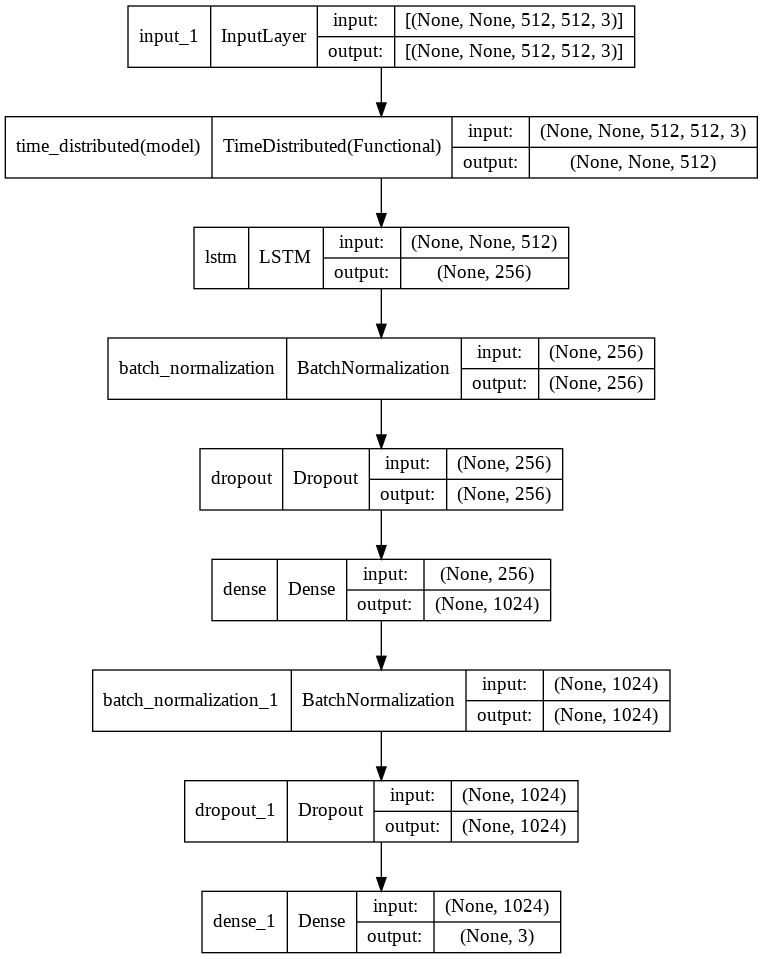

In [ ]:
import tensorflow as tf
from tensorflow.keras.utils import to_categorical

from keras.applications.vgg16 import VGG16
from keras.models import Model
from keras.layers import Dense, Input, Flatten, Conv2D, BatchNormalization, Dropout
from keras.layers.pooling import GlobalAveragePooling2D, GlobalMaxPooling2D
from keras.layers.recurrent import LSTM
from keras.layers.wrappers import TimeDistributed
from tensorflow.keras import optimizers
from keras.utils.vis_utils import plot_model
import keras



# input = Input(shape=(None, 64, 64, 3))
# conv1 = Conv2D(filters=8, kernel_size=3, padding="valid")(input)
# dense = Dense(units=1024, activation="relu")(conv1)
# output = Dense(units=256, activation="softmax")(dense)

# model = Model(inputs=[input], outputs=output)
# model.summary()

video = Input(shape=(None, *DIM, 3))
# print(f"input layer shape: {video.shape}")
cnn_base = VGG16(input_shape=(*DIM, 3), weights="imagenet", include_top=False)
# print(f"vgg16 input layer shape: {cnn_base.input.shape}")
# print(f"vgg16 output layer shape: {cnn_base.output.shape}")

# cnn_out = Conv2D(16, (1, 1))(cnn_base.output)
# print(f"cnn 1x1 conv layer shape: {cnn_out.shape}")
cnn_out = GlobalAveragePooling2D()(cnn_base.output)
# print(f"global average pooling layer shape: {cnn_out.shape}")
cnn = Model(inputs=cnn_base.input, outputs=cnn_out)
# print(f"cnn output layer shape: {cnn.output.shape}")
cnn.trainable = False

encoded_frames = TimeDistributed(cnn)(video)
# print(f"time distributed layer shape: {encoded_frames.shape}")
encoded_sequence = LSTM(256)(encoded_frames)
bn1 = BatchNormalization()(encoded_sequence)
dropout1 = Dropout(0.3)(bn1)
# print(f"lstm layer shape: {encoded_sequence.shape}")
# flattened = Flatten()(encoded_frames)
# print(f"flatten layer shape: {hidden_layer.shape}")
hidden_layer = Dense(units=1024, activation="relu")(dropout1)
bn2 = BatchNormalization()(hidden_layer)
dropout2 = Dropout(0.3)(bn2)
# print(f"dense layer shape: {hidden_layer.shape}")
outputs = Dense(units=n_classes, activation="softmax")(dropout2)
# print(f"output layer shape: {outputs.shape}")
model = Model([video], outputs)
model.summary()
plot_model(model, show_shapes=True, show_layer_names=True)

In [ ]:
optimizer = tf.keras.optimizers.Nadam(lr=0.002,
                             beta_1=0.9,
                             beta_2=0.999, 
                             epsilon=1e-08,
                             schedule_decay=0.004)

model.compile(loss="categorical_crossentropy",
              optimizer=optimizer,
              metrics=["accuracy"])

early_stopping_cb = keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True, monitor="val_accuracy")
checkpoint_cb = keras.callbacks.ModelCheckpoint("vgg16_lstm_model.h5", save_best_only=True)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/nadam.py:73: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Nadam, self).__init__(name, **kwargs)


In [ ]:
history = model.fit(x=training_generator,
                    validation_data=validation_generator,
                    epochs=50,
                    use_multiprocessing=True,
                    workers=-1,
                    callbacks=[checkpoint_cb])

Epoch 1/50


In [ ]:
model.evaluate(x=validation_generator, workers=-1)

In [ ]:
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor, Lambda, Compose
import matplotlib.pyplot as plt


In [ ]:
training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

In [ ]:
batch_size = 11

train_dataloader = DataLoader(training_data, batch_size=batch_size)
test_dataloader = DataLoader(test_data, batch_size=batch_size)

for X, y in test_dataloader:
    print("Shape of X [N, C, H, W]: ", X.shape)
    print("Shape of y: ", y.shape, y.dtype)
    break

Shape of X [N, C, H, W]:  torch.Size([11, 1, 28, 28])
Shape of y:  torch.Size([11]) torch.int64


In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using {device} device")

class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.flatten = nn.Flatten()

        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 10)
        )
    
    def forward(self, x):
        x = self.flatten(x)        
        logits = self.linear_relu_stack(x)
        return logits


model = NeuralNetwork().to(device)
model

Using cpu device


NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
)

In [ ]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=1e-3)

In [ ]:
def train(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    model.train()
    for batch, (X, y) in enumerate(dataloader):
        X, y = X.to(device), y.to(device)

        pred = model(X)
        loss = loss_fn(pred, y)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if batch % 100 == 0:
            loss, current = loss.item(), batch * len(X)
            print(f"loss: {loss:>7f} [{current:>5d}/{size:>5d}]")

In [ ]:
def test(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    model.eval()
    test_loss, correct = 0, 0
    with torch.no_grad():
        for X, y in dataloader:
            X, y = X.to(device), y.to(device)
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()
        test_loss /= num_batches
        correct /= size
        print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")

In [ ]:
epochs = 1
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------")
    train(train_dataloader, model, loss_fn, optimizer)
    test(test_dataloader, model, loss_fn)
print("Done!")

Epoch 1
-------------------------
loss: 2.302859 [    0/60000]
loss: 2.264346 [ 1100/60000]
loss: 2.276082 [ 2200/60000]
loss: 2.273446 [ 3300/60000]
loss: 2.264219 [ 4400/60000]
loss: 2.233257 [ 5500/60000]
loss: 2.219522 [ 6600/60000]
loss: 2.179315 [ 7700/60000]
loss: 2.197814 [ 8800/60000]
loss: 2.129591 [ 9900/60000]
loss: 2.155817 [11000/60000]
loss: 2.107745 [12100/60000]
loss: 2.078653 [13200/60000]
loss: 2.107114 [14300/60000]
loss: 2.141921 [15400/60000]
loss: 1.981455 [16500/60000]
loss: 1.977318 [17600/60000]
loss: 1.851433 [18700/60000]
loss: 1.961862 [19800/60000]
loss: 1.744733 [20900/60000]
loss: 1.855183 [22000/60000]
loss: 1.783486 [23100/60000]
loss: 1.645074 [24200/60000]
loss: 1.710217 [25300/60000]
loss: 1.821563 [26400/60000]
loss: 1.668818 [27500/60000]
loss: 1.401794 [28600/60000]
loss: 1.628207 [29700/60000]
loss: 1.255914 [30800/60000]
loss: 1.550457 [31900/60000]
loss: 1.445719 [33000/60000]
loss: 1.124088 [34100/60000]
loss: 1.161600 [35200/60000]
loss: 1.4